In [ ]:
!pip install tensorflow==2.5.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462.4 KB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 64.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
#IMPORTS NECESSARY
import os
import cv2
import random
import argparse
import numpy as np
import string
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Layer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#Loading the captcha files
!unzip -qq aadhar_captcha_files.zip

warning [aadhar_captcha_files.zip]:  1048576 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  1048576
  (attempting to re-compensate)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
# first install python 3.6
!sudo apt-get update -y
!sudo apt-get install python3.6
# change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 1
# select python version
!sudo update-alternatives --config python3
# check python version
!python --version
# install pip for new python
!sudo apt-get install python3.6-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
# upgrade pip
!sudo apt install python3-pip
!python -m pip install --upgrade pip


Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [972 kB]
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [28.5 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,590 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubu

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [ ]:
datapath= "./captchas"
symbols = string.ascii_lowercase + string.ascii_uppercase + '0123456789' #All symbols in captcha
len_symbols = len(string.ascii_lowercase + string.ascii_uppercase + "0123456789")

In [ ]:
def myModel():

    inputs = Input(shape=(50,180,1) , name='image')
    x= Conv2D(16, (3,3),padding='same',activation='relu')(inputs)
    x = MaxPooling2D((2,2) , padding='same')(x)
    x= Conv2D(32, (3,3),padding='same',activation='relu')(x)
    x = MaxPooling2D((2,2) , padding='same')(x)
    x= Conv2D(32, (3,3),padding='same',activation='relu')(x)
    x = MaxPooling2D((2,2) , padding='same')(x)
    x = BatchNormalization()(x)
    out_flat= Flatten()(x)

    #char-1
    dense_1 = Dense(64 , activation='relu')(out_flat)
    dropout_1= Dropout(0.5)(dense_1)
    out_1 = Dense(len_symbols , activation='sigmoid' , name='char_1')(dropout_1)

    #char-2
    dense_2 = Dense(64 , activation='relu')(out_flat)
    dropout_2= Dropout(0.5)(dense_2)
    out_2 = Dense(len_symbols , activation='sigmoid' , name='char_2')(dropout_2)

    #char-3
    dense_3 = Dense(64 , activation='relu')(out_flat)
    dropout_3= Dropout(0.5)(dense_3)
    out_3 = Dense(len_symbols , activation='sigmoid' , name='char_3')(dropout_3)

    #char-4
    dense_4 = Dense(64 , activation='relu')(out_flat)
    dropout_4= Dropout(0.5)(dense_4)
    out_4 = Dense(len_symbols , activation='sigmoid' , name='char_4')(dropout_4)

    #char-5
    dense_5 = Dense(64 , activation='relu')(out_flat)
    dropout_5= Dropout(0.5)(dense_5)
    out_5 = Dense(len_symbols , activation='sigmoid' , name='char_5')(dropout_5)

    model_out = Model(inputs=inputs , outputs=[out_1 , out_2 , out_3 , out_4 , out_5])

    return model_out


In [ ]:
model = myModel()


In [ ]:
plot_model(model , 'captcha_predictor.png' , show_shapes=True)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=["accuracy"])


In [ ]:
def preprocessing(path):


	print("[INFO] Processing Images.......")
	n_samples= len(os.listdir(path))


	# variables for data and labels
	X = np.zeros((n_samples , 50 , 180 ,1 ))  # (samples , height , width , channel)
	y = np.zeros((n_samples,5, 62 ))       #(samples , captcha characters , ascii char + numbers)

	for i , image in enumerate(os.listdir(path)):
		img = cv2.imread(os.path.join(path, image) , cv2.IMREAD_GRAYSCALE)

		targets = image.split('.')[0]

		if len(targets)<6:

			img = img/255.0
			img = np.reshape(img , (50,180,1))

			#find the char and one hot encode it to the target
			targ = np.zeros((5,62))

			for l , char in enumerate(targets):

				idx = symbols.find(char)
				targ[l , idx] = 1

			X[i] = img
			y[i,: ,:] = targ

	print("[INFO] Processing Finishes.....")

	return X,y


In [ ]:
X, y = preprocessing(datapath)


[INFO] Processing Images.......
[INFO] Processing Finishes.....


In [ ]:
trainX , testX , trainY , testY = train_test_split(X, y , test_size=0.2 , random_state=42)


In [ ]:
#target values
labels = {'char_1': trainY[:,0,:],
         'char_2': trainY[:,1,:],
         'char_3': trainY[:,2,:],
         'char_4': trainY[:,3,:],
         'char_5': trainY[:,4,:]}

test_labels = {'char_1': testY[:,0,:],
         'char_2': testY[:,1,:],
         'char_3': testY[:,2,:],
         'char_4': testY[:,3,:],
         'char_5': testY[:,4,:]}

In [ ]:
history = model.fit(trainX ,labels , epochs=30 , batch_size=64 , validation_split=0.2)
model.save("model5final.h5")

Epoch 1/30
 4/36 [==>...........................] - ETA: 16s - loss: 0.7073 - char_1_loss: 0.1161 - char_2_loss: 0.1705 - char_3_loss: 0.1612 - char_4_loss: 0.1450 - char_5_loss: 0.1145 - char_1_accuracy: 0.9492 - char_2_accuracy: 0.9336 - char_3_accuracy: 0.9336 - char_4_accuracy: 0.9492 - char_5_accuracy: 0.9531

KeyboardInterrupt: ignored

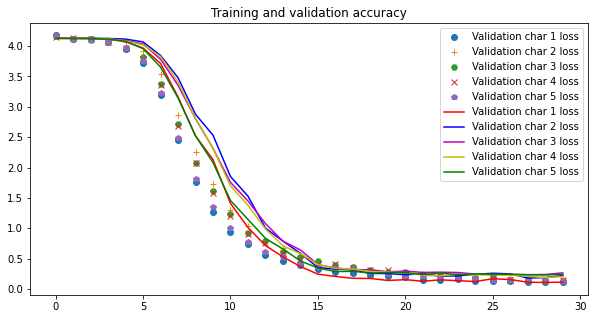

In [ ]:
val_char_1_loss = history.history['val_char_1_loss']
val_char_2_loss = history.history['val_char_2_loss']
val_char_3_loss = history.history['val_char_3_loss']
val_char_4_loss = history.history['val_char_4_loss']
val_char_5_loss = history.history['val_char_5_loss']

char_1_loss = history.history['char_1_loss']
char_2_loss = history.history['char_2_loss']
char_3_loss = history.history['char_3_loss']
char_4_loss = history.history['char_4_loss']
char_5_loss = history.history['char_5_loss']


epochs = range(len(val_char_1_loss))
plt.figure(figsize=(10,5))
plt.plot(epochs, char_1_loss, 'o', label='Validation char 1 loss')
plt.plot(epochs, char_2_loss, '+', label='Validation char 2 loss')
plt.plot(epochs, char_3_loss, 'H', label='Validation char 3 loss')
plt.plot(epochs, char_4_loss, 'x', label='Validation char 4 loss')
plt.plot(epochs, char_5_loss, 'p', label='Validation char 5 loss')
plt.plot(epochs, val_char_1_loss, 'r', label='Validation char 1 loss')
plt.plot(epochs, val_char_2_loss, 'b', label='Validation char 2 loss')
plt.plot(epochs, val_char_3_loss, 'm', label='Validation char 3 loss')
plt.plot(epochs, val_char_4_loss, 'y', label='Validation char 4 loss')
plt.plot(epochs, val_char_5_loss, 'g', label='Validation char 5 loss')

plt.title('Training and validation accuracy')
plt.legend()

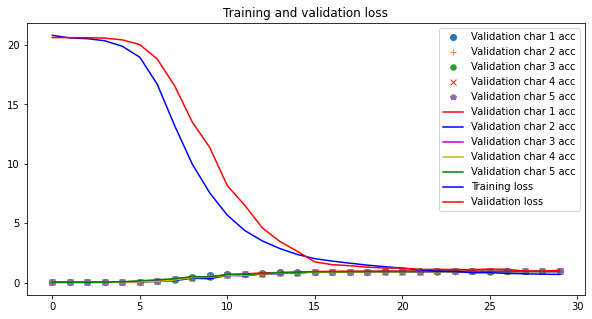

In [ ]:
plt.figure(figsize=(10,5))

val_char_1_acc = history.history['val_char_1_accuracy']
val_char_2_acc = history.history['val_char_2_accuracy']
val_char_3_acc = history.history['val_char_3_accuracy']
val_char_4_acc = history.history['val_char_4_accuracy']
val_char_5_acc = history.history['val_char_5_accuracy']
char_1_acc = history.history['char_1_accuracy']
char_2_acc = history.history['char_2_accuracy']
char_3_acc = history.history['char_3_accuracy']
char_4_acc = history.history['char_4_accuracy']
char_5_acc = history.history['char_5_accuracy']

plt.plot(epochs, char_1_acc, 'o', label='Validation char 1 acc')
plt.plot(epochs, char_2_acc, '+', label='Validation char 2 acc')
plt.plot(epochs, char_3_acc, 'H', label='Validation char 3 acc')
plt.plot(epochs, char_4_acc, 'x', label='Validation char 4 acc')
plt.plot(epochs, char_5_acc, 'p', label='Validation char 5 acc')
plt.plot(epochs, val_char_1_acc, 'r', label='Validation char 1 acc')
plt.plot(epochs, val_char_2_acc, 'b', label='Validation char 2 acc')
plt.plot(epochs, val_char_3_acc, 'm', label='Validation char 3 acc')
plt.plot(epochs, val_char_4_acc, 'y', label='Validation char 4 acc')
plt.plot(epochs, val_char_5_acc, 'g', label='Validation char 5 acc')

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
score =model.evaluate(testX , test_labels , batch_size=32)


23/23 [==============================] - 2s 65ms/step - loss: 0.9562 - char_1_loss: 0.1355 - char_2_loss: 0.1863 - char_3_loss: 0.2680 - char_4_loss: 0.2003 - char_5_loss: 0.1661 - char_1_accuracy: 0.9667 - char_2_accuracy: 0.9417 - char_3_accuracy: 0.9390 - char_4_accuracy: 0.9320 - char_5_accuracy: 0.9459


In [ ]:
print("The score of model:" , score)


The score of model: [0.9561854004859924, 0.1355155110359192, 0.18626993894577026, 0.26795142889022827, 0.20034277439117432, 0.1661057025194168, 0.9667128920555115, 0.9417475461959839, 0.9389736652374268, 0.9320388436317444, 0.9459084868431091]


In [ ]:
def predictions(image):

    image = np.reshape(image , (50,180))
    result = model.predict(np.reshape(image , (1,50,180,1)))
    result = np.reshape(result ,(5,62))
    indexes =[]
    for i in result:
        indexes.append(np.argmax(i))

    label=''
    for i in indexes:
        label += symbols[i]

    plt.imshow(image)
    plt.title(label)


In [ ]:
!pip show keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: 
Required-by: keras-vis, tensorflow


1/1 [==============================] - 0s 34ms/step


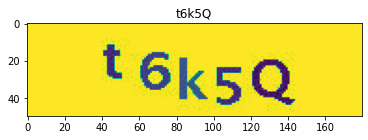

In [ ]:
predictions(testX[58])